# Dataset Exploration -  N-CMAPSS DS02

Новый набор данных C-MAPSS DS02 от NASA содержит траектории ухудшения характеристик 9 турбовентиляторных двигателей с неизвестным и различным исходным состоянием для полных полетов и двух режимов отказа (снижение эффективности HPT и снижение эффективности HPT в сочетании со снижением эффективности и мощности LPT). Данные были синтетически сгенерированы с помощью динамической модели Commercial Modular Aero-Propulsion System Simulation (C-MAPSS). Данные содержат многомерные показания датчиков по траекториям полного пробега до отказа. Поэтому записи прекращаются в момент цикла/времени отказа двигателя. Всего доступно 6,5 млн временных меток.

In [3]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [4]:
### Set-up - Define file location
filename = 'N-CMAPSS_DS02-006.h5'

#### Read Raw Data

In [ ]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
with h5py.File(filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.02580069999999992

W shape: (6517190, 4)
X_s shape: (6517190, 14)
X_v shape: (6517190, 14)
T shape: (6517190, 10)
A shape: (6517190, 4)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Auxiliary Information (Дополнительная информация) ($A$)

In [37]:
from matplotlib.pyplot import step


df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

,unit,cycle,Fc,hs
count,6.517190e+06,6.517190e+06,6.517190e+06,6.517190e+06
mean,1.166711e+01,3.692344e+01,2.885376e+00,2.424109e-01
std,6.039334e+00,2.187185e+01,3.867783e-01,4.285416e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.000000e+00,1.800000e+01,3.000000e+00,0.000000e+00
50%,1.100000e+01,3.600000e+01,3.000000e+00,0.000000e+00
75%,1.800000e+01,5.400000e+01,3.000000e+00,0.000000e+00
max,2.000000e+01,8.900000e+01,3.000000e+00,1.000000e+00


###  Units Ids

In [7]:
print('Engine units in df: ', np.unique(df_A['unit']))

Engine units in df:  [ 2.  5. 10. 11. 14. 15. 16. 18. 20.]


### Классы полета

Юниты разделены на три класса полетов в зависимости от того, выполняет ли юнит полеты на короткие расстояния (т. е. класс полета 1), полеты на средние расстояния (т. е. класс полета 2) или полеты на длинные расстояния (т. е. класс полета 3). В каждом из классов полетов доступно несколько реальных условий полета.

| Flight Class   | Flight Length [h]
| :-----------:  | :-----------:    
| 1              |    1 to 3        
| 2              |    3 to 5        
| 3              |    5 to 7        


Text(0, 0.5, 'Flight Class # [-]')

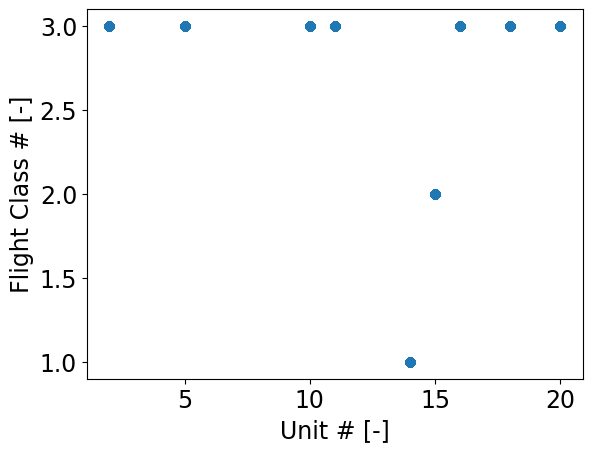

In [8]:
labelsize = 17
plt.plot(df_A.unit, df_A.Fc, 'o')
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlabel('Unit # [-]', fontsize=labelsize)
plt.ylabel('Flight Class # [-]', fontsize=labelsize )

### End Of Failure ($t_{\text{EOF}}$)

Работа до отказа занимает разное количество циклов для каждого устройства. Ниже приводится общее количество циклов для каждого устройства.

In [40]:
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

Unit: 2.0 - Number of flight cyles (t_{EOF}):  75
Unit: 5.0 - Number of flight cyles (t_{EOF}):  89
Unit: 10.0 - Number of flight cyles (t_{EOF}):  82
Unit: 11.0 - Number of flight cyles (t_{EOF}):  59
Unit: 14.0 - Number of flight cyles (t_{EOF}):  76
Unit: 15.0 - Number of flight cyles (t_{EOF}):  67
Unit: 16.0 - Number of flight cyles (t_{EOF}):  63
Unit: 18.0 - Number of flight cyles (t_{EOF}):  71
Unit: 20.0 - Number of flight cyles (t_{EOF}):  66


## Operative Conditions (Условия эксплуатации) ($w$)

DASHlink — Данные о полетах Tail 687 (2012). Проверено 29.01.2019 по адресу https://c3.nasa.gov/dashlink/

In [10]:
df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values

In [11]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [12]:
def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

### Flight Traces (Следы полетов)

<Figure size 640x480 with 0 Axes>

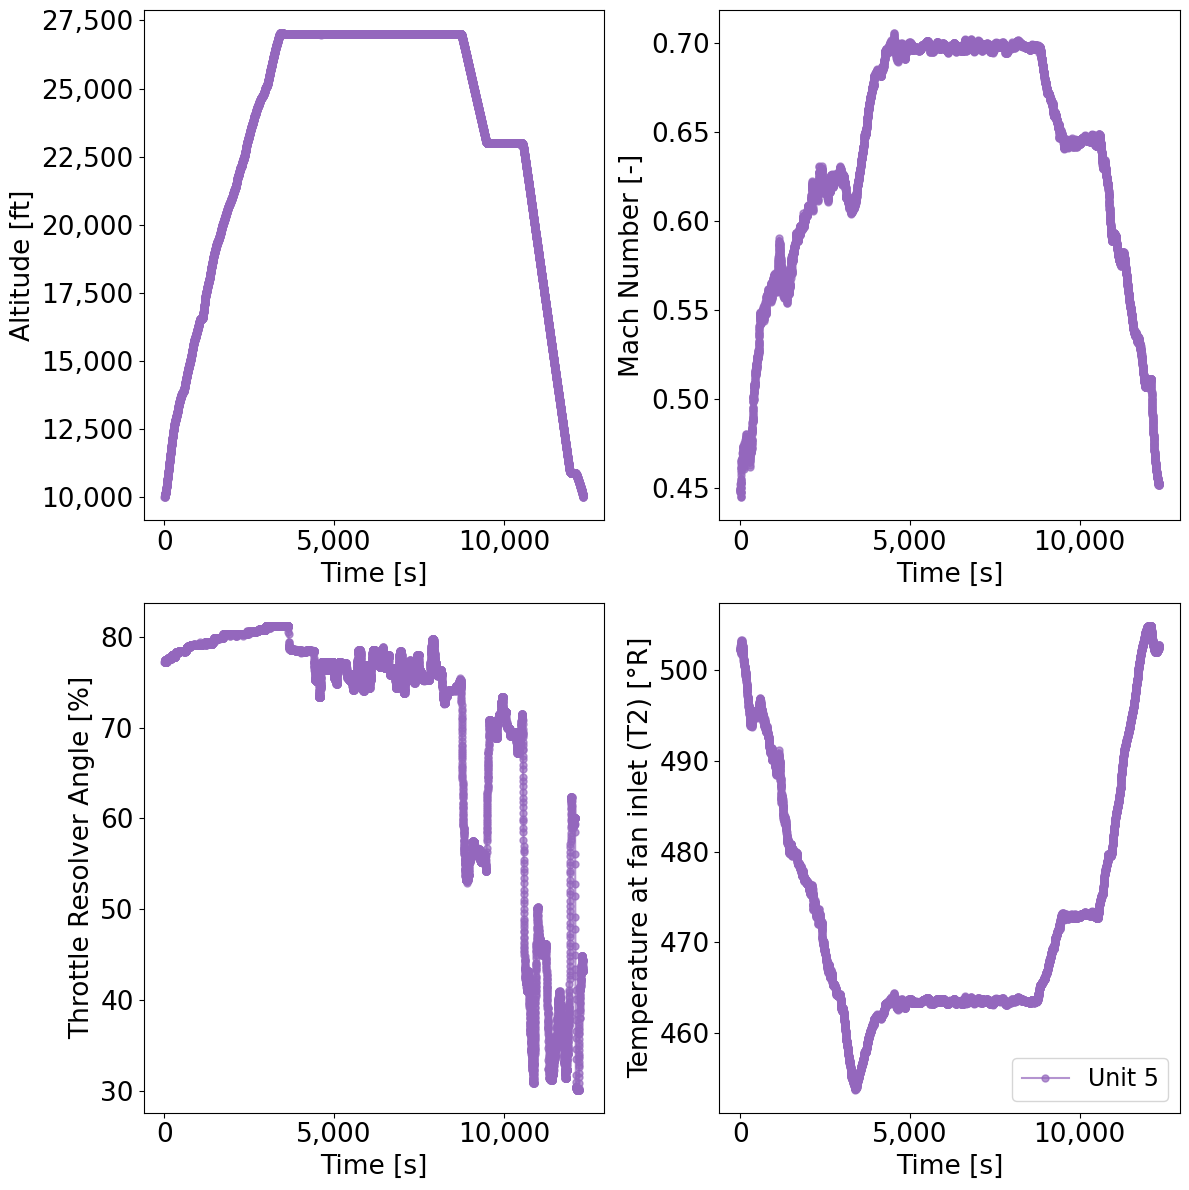

In [13]:
df_W_u = df_W.loc[(df_A.unit == 5) & (df_A.cycle == 1)]
df_W_u.reset_index(inplace=True, drop=True)
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

### Flight envelope (Полетная оболочка)

Text(0, 0.5, 'Flight Altitude - [ft]')

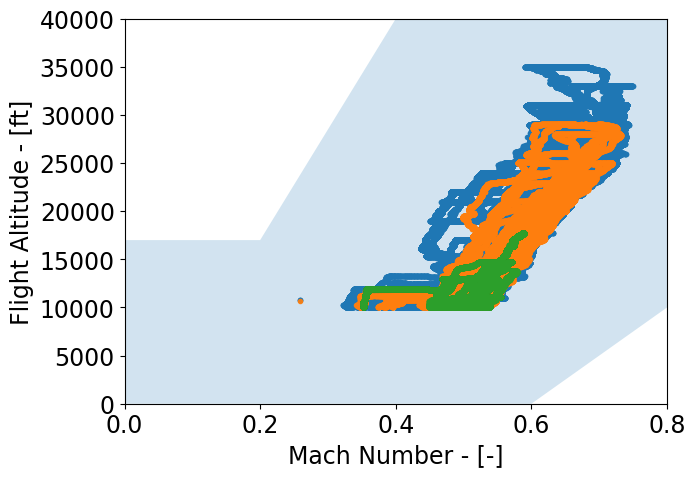

In [14]:
labelsize = 17
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8])
u = np.array([1.7, 1.7, 4.0, 4.0, 4.0])*10000
l = np.array([0.0, 0.0, 0.0, 0.0, 1.0])*10000
plt.figure(figsize=(7,5)) 
plt.fill_between(x, l, u, alpha=0.2)
plt.plot(df_W.loc[df_A['Fc'] == 3, 'Mach'], df_W.loc[df_A['Fc'] == 3, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 2, 'Mach'], df_W.loc[df_A['Fc'] == 2, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 1, 'Mach'], df_W.loc[df_A['Fc'] == 1, 'alt'], '.', alpha=0.9)
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlim((0.0, 0.8))
plt.ylim((0, 40000)) 
plt.xlabel('Mach Number - [-]', fontsize=labelsize)
plt.ylabel('Flight Altitude - [ft]', fontsize=labelsize)

### Histogram of Flight Conditions (Гистограмма условий полета)

In [15]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()

/var/folders/bt/nbybvdjd4dl4j63pnps0226w0000gn/T/ipykernel_33077/4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
/var/folders/bt/nbybvdjd4dl4j63pnps0226w0000gn/T/ipykernel_33077/4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
/var/folders/bt/nbybvdjd4dl4j63pnps0226w0000gn/T/ipykernel_33077/4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
/var/folders/bt/nbybvdjd4dl4j63pnps0226w0000gn/T/ipykernel_33077/4172860585.py:21: FutureWarning: 

`sh

<Figure size 640x480 with 0 Axes>

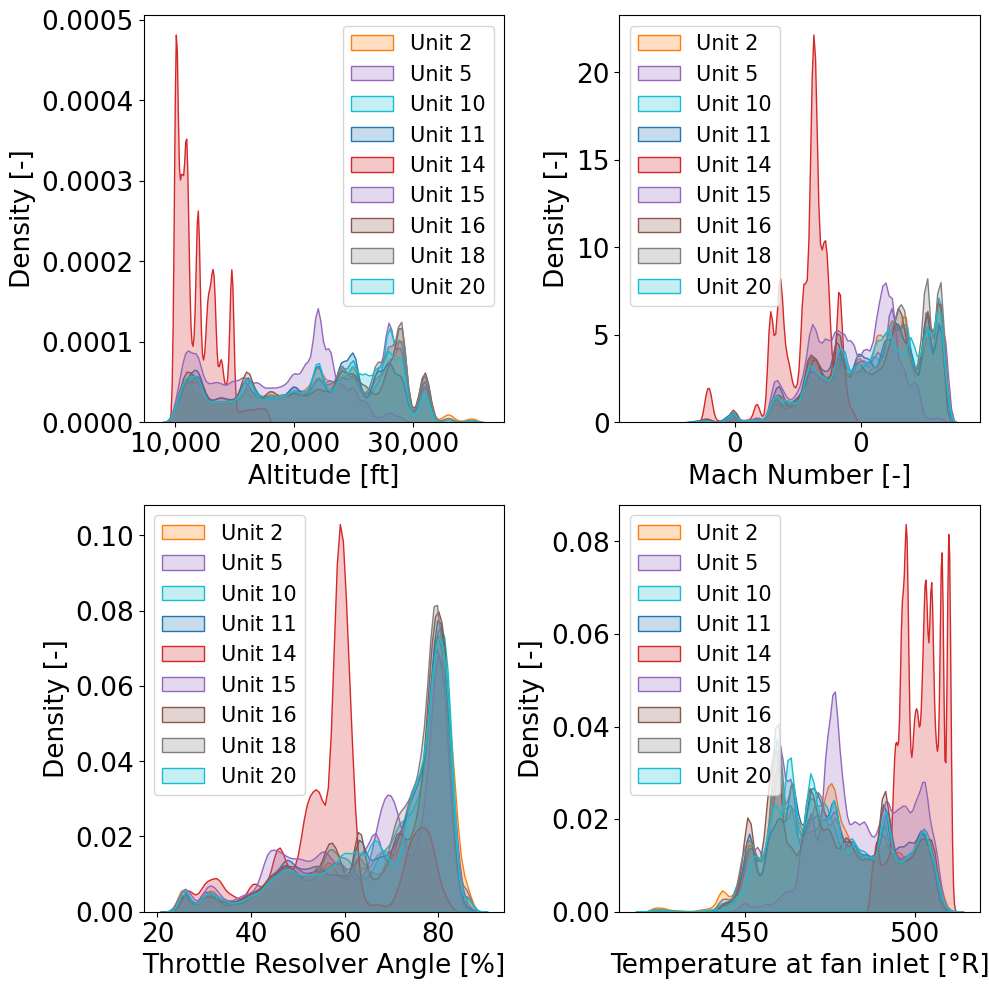

In [16]:
variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=19, name='kde_DS02.png')

## Degradation (Деградация) ($\theta$)

In [17]:
df_T = DataFrame(data=T, columns=T_var) 
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_Ts = df_T.drop_duplicates()
df_Ts.describe()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
count,648.0,648.0,648.0,648.0,648.0,648.0,648.000000,648.0,648.000000,648.000000,648.000000,648.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,-0.003271,0.0,-0.001792,-0.002024,11.942901,37.060185
std,0.0,0.0,0.0,0.0,0.0,0.0,0.003452,0.0,0.003152,0.003209,5.689124,21.773268
min,0.0,0.0,0.0,0.0,0.0,0.0,-0.018668,0.0,-0.023184,-0.021429,2.000000,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,-0.004257,0.0,-0.001982,-0.002475,5.000000,18.750000
50%,0.0,0.0,0.0,0.0,0.0,0.0,-0.001735,0.0,-0.000707,-0.000831,14.000000,36.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,-0.001008,0.0,0.000000,0.000000,16.000000,54.250000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.000021,0.0,0.000075,0.000000,20.000000,89.000000


In [ ]:
# import plotly.express as px
# varsel = ['unit', 'HPT_eff_mod', 'LPT_eff_mod', 'LPT_flow_mod']
# df_Tss = df_Ts.loc[:,varsel]
# fig = px.parallel_coordinates(df_Tss, color="unit", labels={"unit": "Units",
#                               "HPT_eff_mod": "HPT_eff_mod", "LPT_eff_mod": "LPT_eff_mod",
#                               "LPT_flow_mod": "LPT_flow_mod", },
#                               color_continuous_scale=px.colors.diverging.Tealrose,
#                               color_continuous_midpoint=2)
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<Figure size 640x480 with 0 Axes>

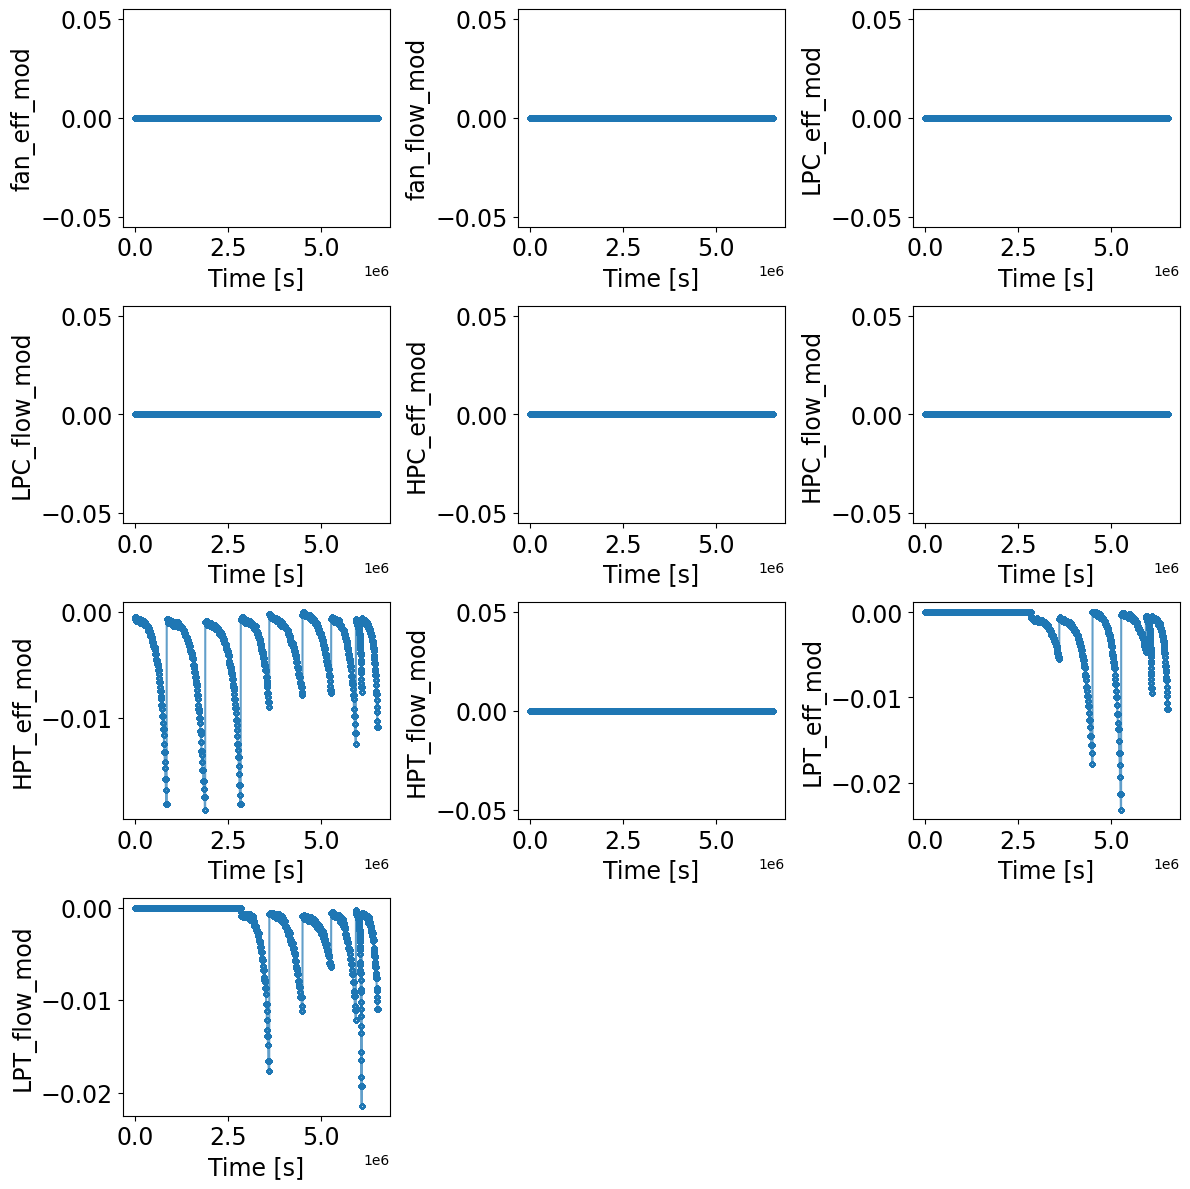

In [21]:
labels = T_var
plot_df_single_color(df_T, T_var , labels)

<Figure size 640x480 with 0 Axes>

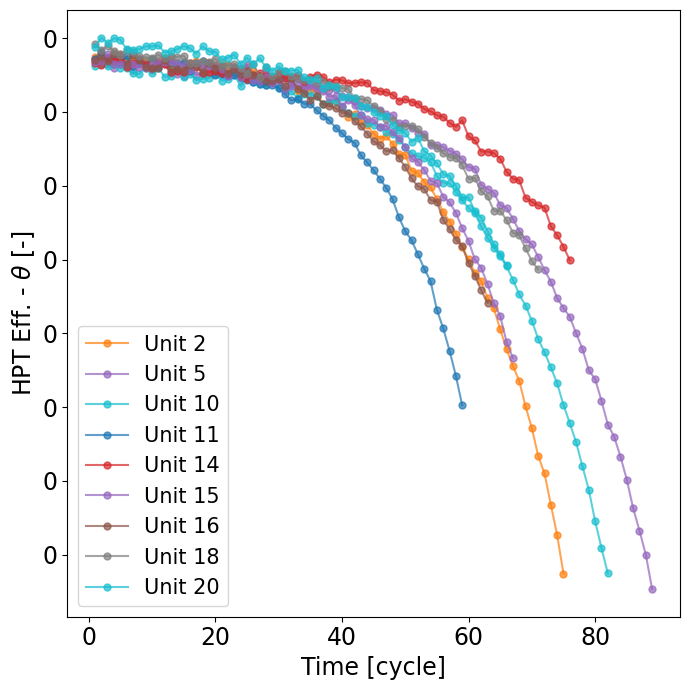

In [22]:
plot_df_color_per_unit(df_Ts, ['HPT_eff_mod'], [r'HPT Eff. - $\theta$ [-]'], size=7,  option='cycle')

## Sensor readings (Показания датчиков) ($X_s$)

In [23]:
df_X_s = DataFrame(data=X_s, columns=X_s_var) 

###  Single Unit (Один юнит)

<Figure size 640x480 with 0 Axes>

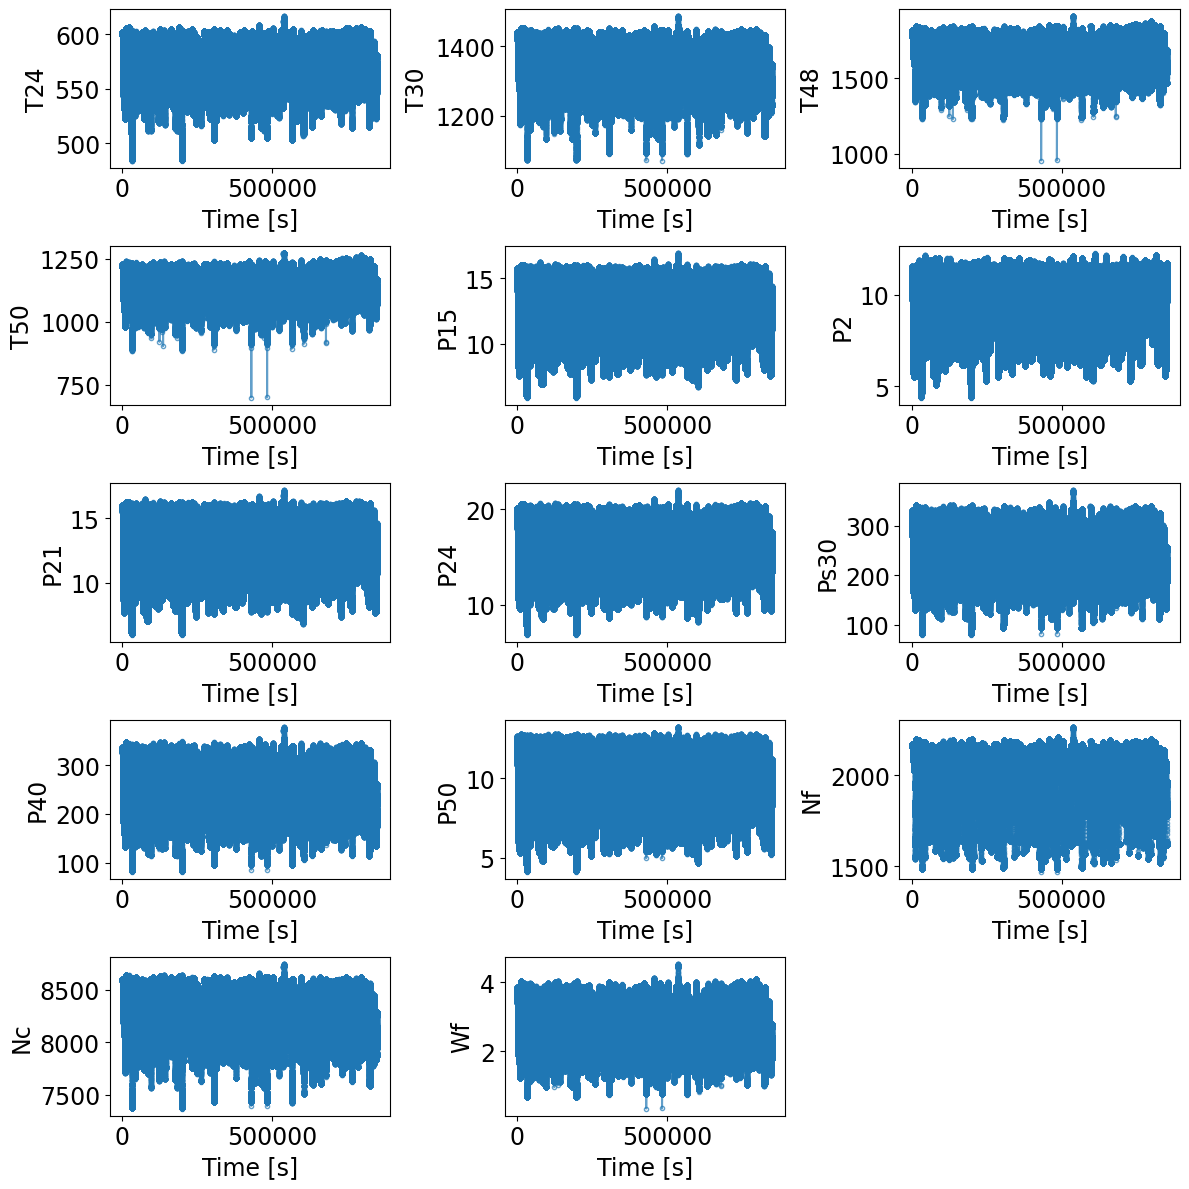

In [24]:
df_X_s_u = df_X_s.loc[df_A.unit == 2]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

###  Single Flight Cycle (Один цикл полета)

<Figure size 640x480 with 0 Axes>

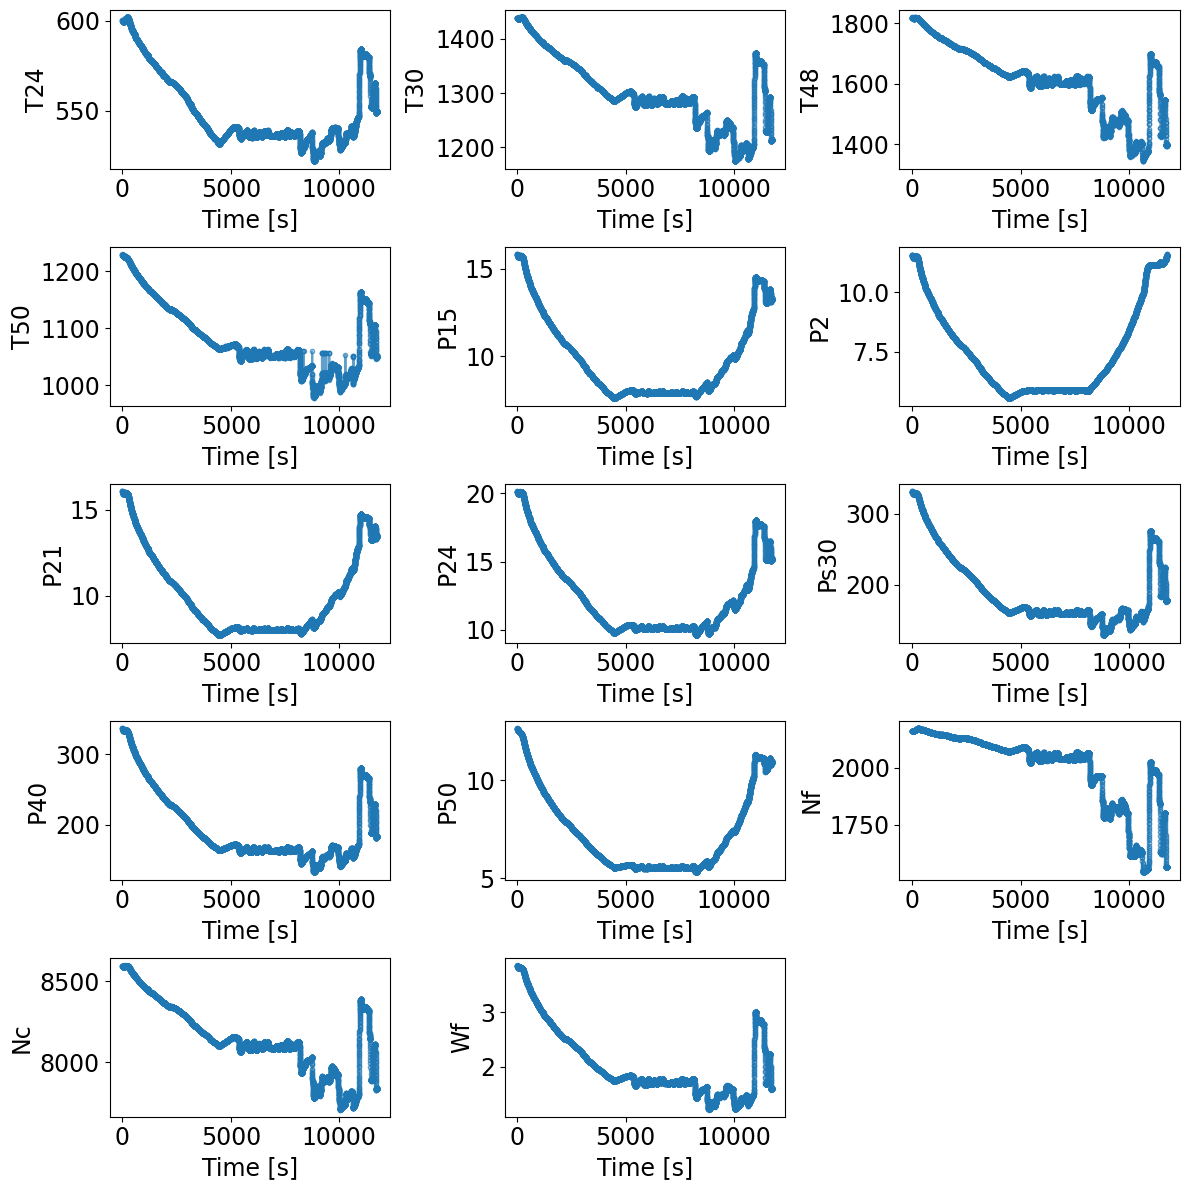

In [25]:
df_X_s_u_c = df_X_s.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)

## Virtual Sensors (Виртуальные датчики) ($X_v$)

In [26]:
df_X_v = DataFrame(data=X_v, columns=X_v_var) 

<Figure size 640x480 with 0 Axes>

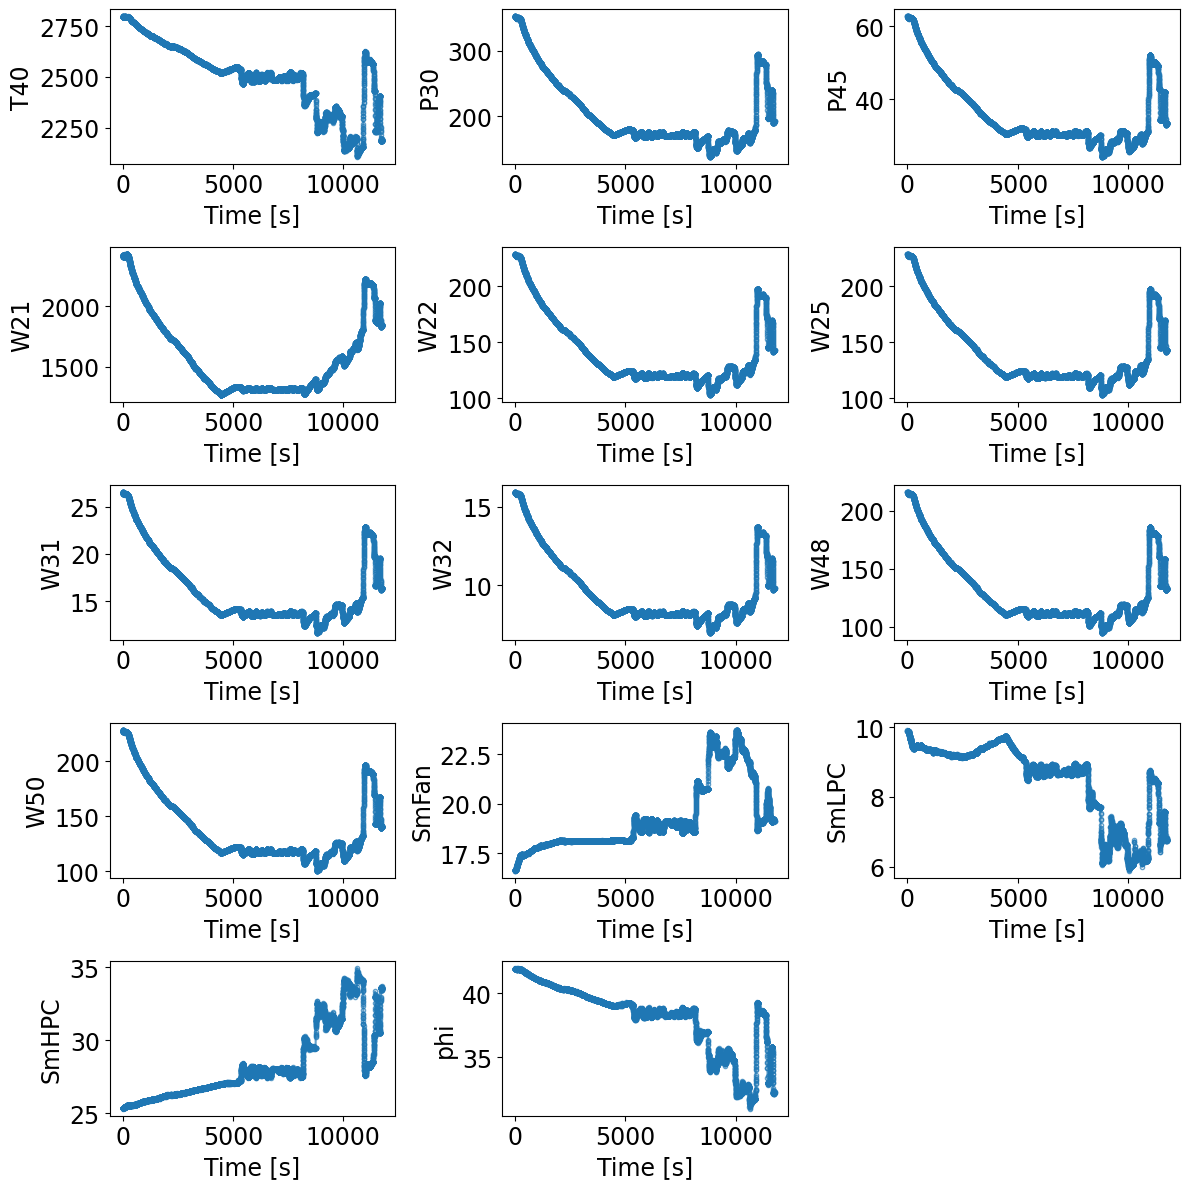

In [27]:
df_X_v_u_c = df_X_v.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_v_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_v_u_c, X_v_var, X_v_var)

## Health state (Состояние здоровья) ($h_s$)

<Figure size 640x480 with 0 Axes>

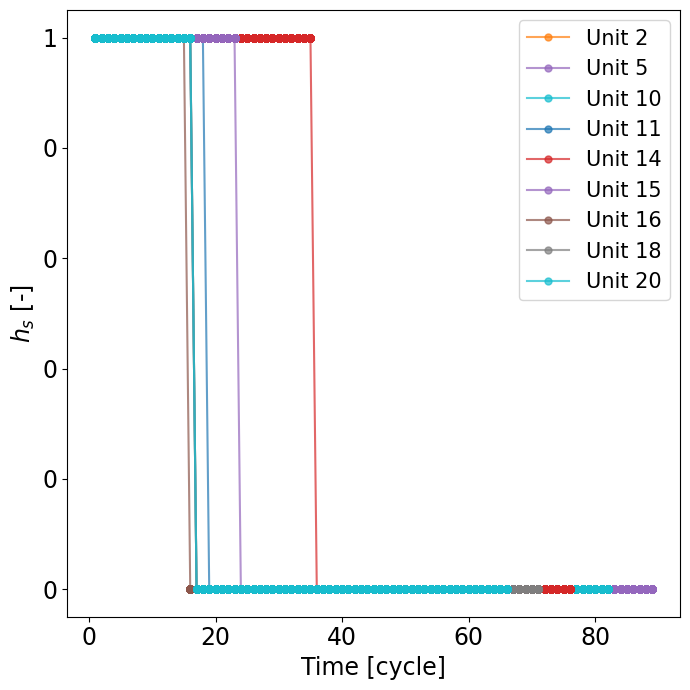

In [28]:
plot_df_color_per_unit(df_A, ['hs'], [r'$h_s$ [-]'], option='cycle')